In [26]:
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange


In [41]:
# Read dataset and select 'Inches' and 'Price' columns
dataset = pd.read_csv('Lab09_uncleaned_laptopData.csv')
print(f"There are {len(dataset.index)} instances.")
dataset
# select column
dataset = dataset[['Inches', 'Ram', 'Memory', 'Price']]
dataset

There are 1303 instances.


,Inches,Ram,Price
0,13.3,8GB,71378.6832
1,13.3,8GB,47895.5232
2,15.6,8GB,30636.0000
3,15.4,16GB,135195.3360
4,13.3,8GB,96095.8080
...,...,...,...
1298,14,4GB,33992.6400
1299,13.3,16GB,79866.7200
1300,14,2GB,12201.1200
1301,15.6,6GB,40705.9200


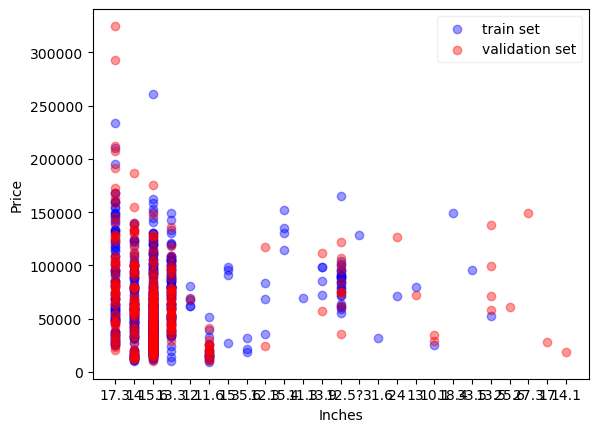

In [30]:
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac)
    val = dataset.drop(train.index)
    # Drop rows where 'Inches' or 'Price' is missing
    train = train.dropna(subset=['Inches', 'Price'])
    val = val.dropna(subset=['Inches', 'Price'])
    return train, val

# Split dataset into train and validation:
train, validation = split_dataset(dataset, train_frac=0.7)
plt.scatter(train['Inches'], train['Price'], c='blue', alpha=0.4)
plt.scatter(validation['Inches'], validation['Price'], c='red', alpha=0.4)
plt.xlabel('Inches')
plt.ylabel('Price')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()


In [16]:
import tensorflow as tf
import keras
from keras import layers, models

In [17]:
# create model
model = keras.Sequential()
model.add(keras.layers.InputLayer(shape=(1,)))
model.add(keras.layers.Dense(200, activation='sigmoid'))
model.add(keras.layers.Dense(200, activation='sigmoid'))
model.add(keras.layers.Dense(200, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='linear'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,001 (316.41 KB)

 Trainable params: 81,001 (316.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
# Convert 'Inches' column to numeric, invalid values will become NaN
train['Inches'] = pd.to_numeric(train['Inches'], errors='coerce')
validation['Inches'] = pd.to_numeric(validation['Inches'], errors='coerce')

# Drop rows where 'Inches' or 'Price' have NaN values
train = train.dropna(subset=['Inches', 'Price'])
validation = validation.dropna(subset=['Inches', 'Price'])

# Verify if all 'Inches' values are numeric now
print(train['Inches'].apply(lambda x: isinstance(x, (int, float))).all())


True


In [23]:
# Train:
loss = 'mse'
metric = 'mae'

epochs = 1750

# dataset is split ‘X’ as input to model
# ‘Y’ as the expected output of model 
x_train, y_train = train['Inches', 'Ram', 'Memory'], train['Price']
x_val, y_val = validation['Inches', 'Ram', 'Memory'], validation['Price']
# Reshape the input to be 2D (number of samples, 1 feature)
x_train = x_train.values.reshape(-1, 1)
x_val = x_val.values.reshape(-1, 1)
# Compile and fit the model
model.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))

Epoch 1/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5301781504.0000 - mae: 61618.8945 - val_loss: 5005751808.0000 - val_mae: 60175.1836
Epoch 2/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5083852288.0000 - mae: 60521.5742 - val_loss: 5005297664.0000 - val_mae: 60171.3984
Epoch 3/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4960088064.0000 - mae: 60246.6875 - val_loss: 5005036032.0000 - val_mae: 60169.2383
Epoch 4/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5135860736.0000 - mae: 60881.6328 - val_loss: 5004798976.0000 - val_mae: 60167.2578
Epoch 5/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4921089536.0000 - mae: 59657.0312 - val_loss: 5004564992.0000 - val_mae: 60165.3242
Epoch 6/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5188336128.0000 - mae: 60916.0273 - val_loss: 5004334080.0000 - val_mae: 60163.3984
Epoch 7/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4636266496.0000 - mae: 58204.4883 - val_loss: 5004109312.0000 - val_mae: 60

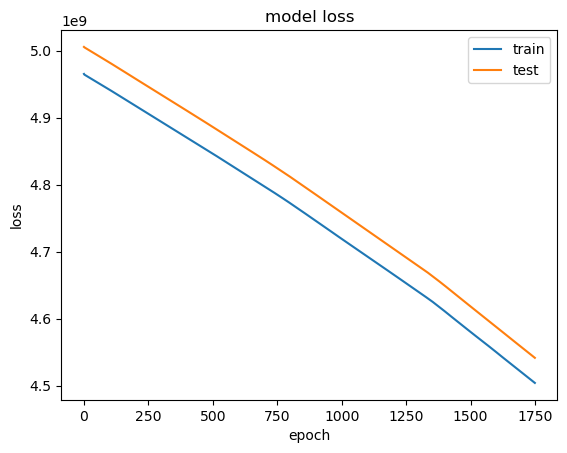

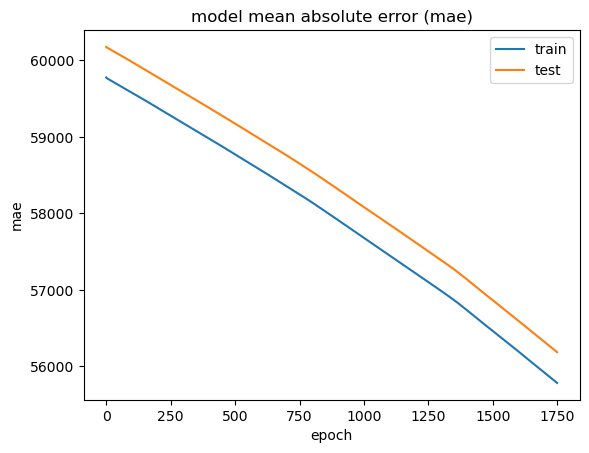

In [25]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
